# AR models

In [12]:
import pandas as pd
import numpy as np

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

jtplot.style(figsize=(15, 9))

## AR-models Examples: Time-series Forecasting. Part 1

<AxesSubplot:>

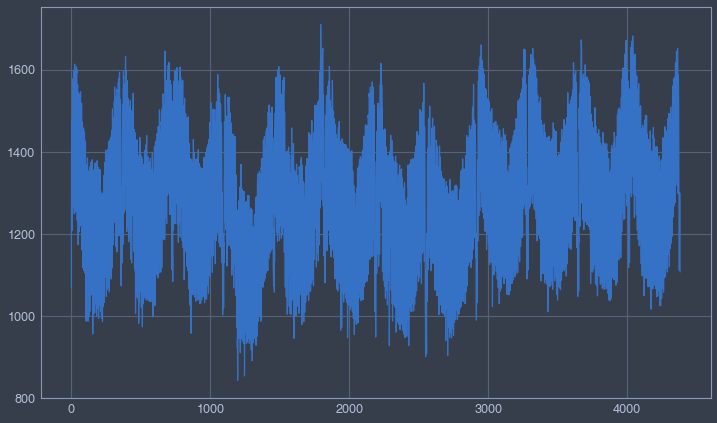

In [4]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=',')

df['Consumption'].plot()

In [5]:
df_stationarity_test = adfuller(df['Consumption'], autolag='AIC')
print(f'p-value: {df_stationarity_test[1]}')

p-value: 4.74405490184152e-08


In [6]:
df_stationarity_test

(-6.239148288864521,
 4.74405490184152e-08,
 31,
 4351,
 {'1%': -3.4318538295011636,
  '5%': -2.8622045082106773,
  '10%': -2.5671237222704466},
 47966.592823559666)

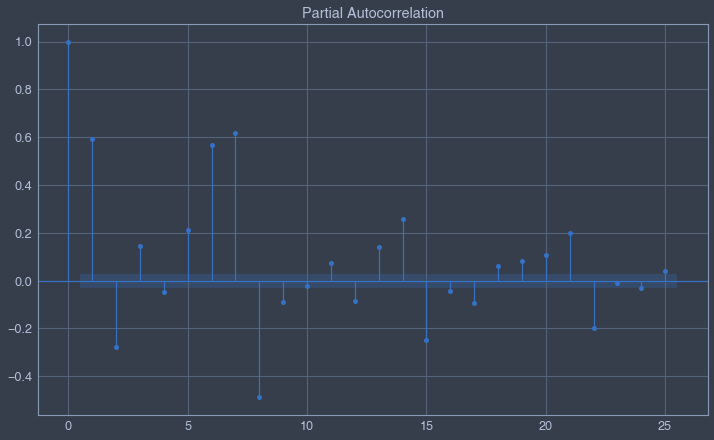

In [8]:
pacf = plot_pacf(df['Consumption'], lags=25)

In [10]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

ar_model = AutoReg(train_data, lags=8, old_names=True).fit()

print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Wed, 24 Jul 2024   AIC                              8.503
Time:                        20:43:39   BIC                              8.518
Sample:                             8   HQIC                             8.509
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

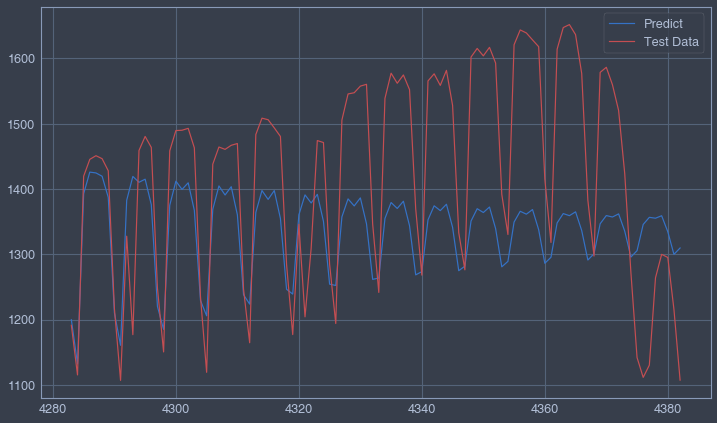

In [14]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

plt.plot(pred, label='Predict')
plt.plot(test_data, color='r', label='Test Data')
plt.legend()

## AR-models Examples: Time-series Forecasting. Part 2

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<AxesSubplot:xlabel='Date'>

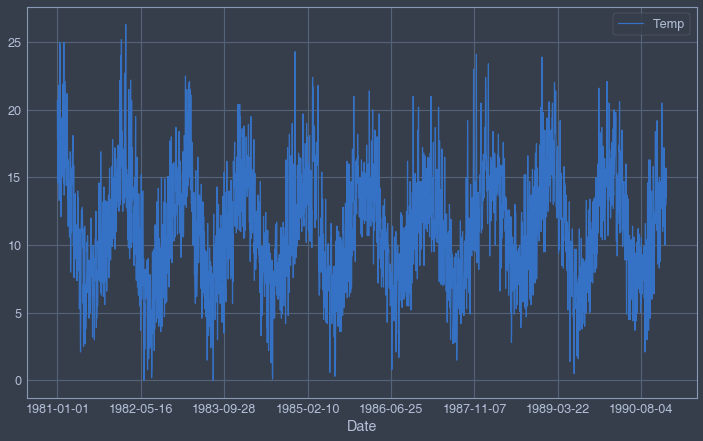

In [6]:
df.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

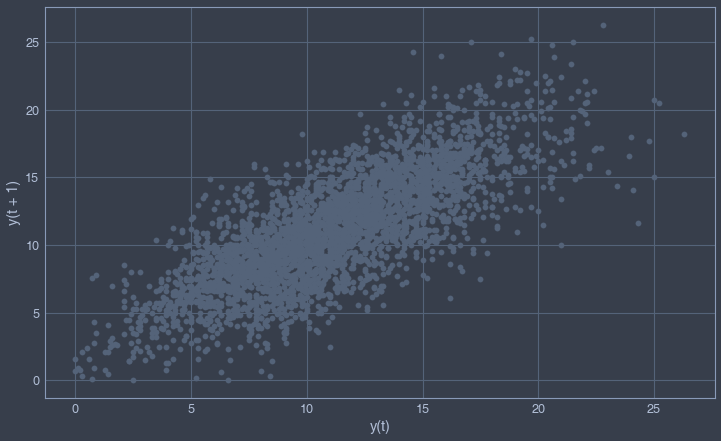

In [7]:
pd.plotting.lag_plot(df) # clearly shows a relationship or correlation.

In [4]:
df['t+1'] = df['Temp'].shift(1)
df

,Temp,t+1
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,20.7
1981-01-03,18.8,17.9
1981-01-04,14.6,18.8
1981-01-05,15.8,14.6
...,...,...
1990-12-27,14.0,14.6
1990-12-28,13.6,14.0
1990-12-29,13.5,13.6


In [11]:
df.corr()

,Temp,t+1
Temp,1.00000,0.77487
t+1,0.77487,1.00000


In [13]:
df

,Temp,t+1
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,20.7
1981-01-03,18.8,17.9
1981-01-04,14.6,18.8
1981-01-05,15.8,14.6
...,...,...
1990-12-27,14.0,14.6
1990-12-28,13.6,14.0
1990-12-29,13.5,13.6


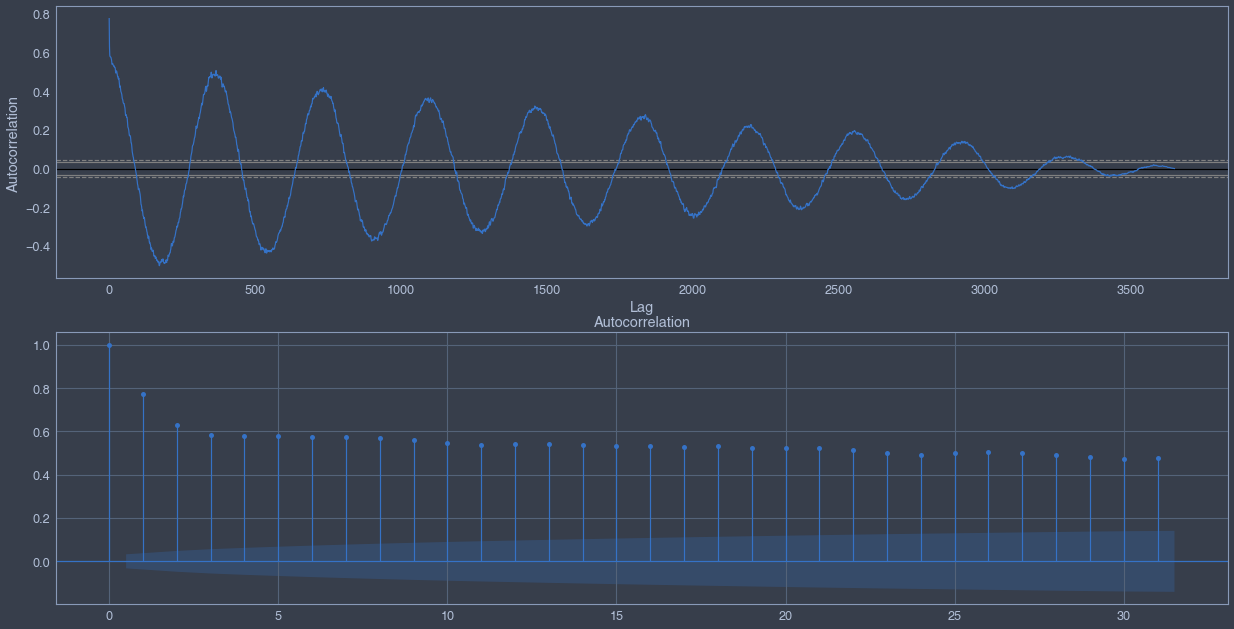

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(21, 11))

pd.plotting.autocorrelation_plot(df['Temp'], ax=ax[0])
plot_acf(df['Temp'], lags=31, ax=ax[1]);


In [57]:
def visualize(test, prediction):
    plt.plot(test, label='Test')
    plt.plot(predictions, color='r', label='Prediction')
    plt.legend()

### Persistance Model

In [5]:
df

,Temp,t+1
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,20.7
1981-01-03,18.8,17.9
1981-01-04,14.6,18.8
1981-01-05,15.8,14.6
...,...,...
1990-12-27,14.0,14.6
1990-12-28,13.6,14.0
1990-12-29,13.5,13.6


In [6]:
df.columns = ['t-1', 't+1']

X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 

In [8]:
# persistence model
def model_persistence(x):
    return x

Test MSE: 3.423


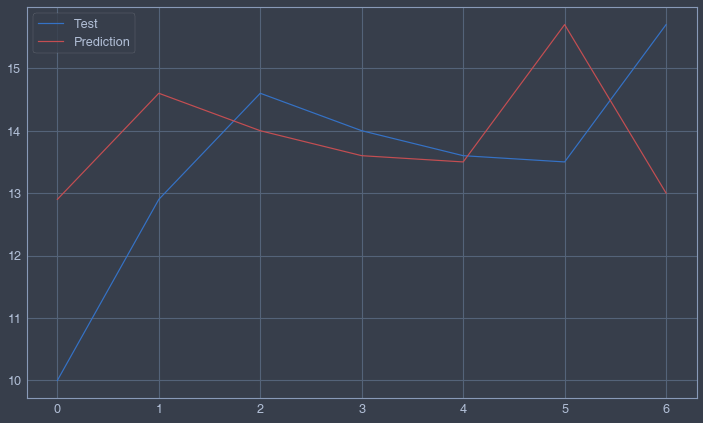

In [60]:
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

test_score = mean_squared_error(test_y, predictions)
print(f'Test MSE: {test_score:.3f}')

visualize(test_y, predictions)

### Autoregression Model

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Coefficients: [ 5.84079294e-01  5.90061231e-01 -9.08552623e-02  4.77449509e-02
  4.01494246e-02  3.95818033e-02  2.76018732e-02  4.48114611e-02
  1.38193304e-02  3.86459630e-02 -3.40312953e-04  5.31860952e-03
  1.89005769e-02  2.76027643e-02  1.06525814e-03  2.46541576e-02
  7.60020848e-03  1.12293541e-02  3.55384385e-02 -7.84840519e-03
  2.53893909e-02  2.03398212e-02  1.40560614e-02 -1.66757514e-02
 -3.07569529e-03  3.16140054e-02]
predicted=11.88124697024303, expected=[12.9]
predicted=13.086396761473946, expected=[14.6]
predicted=13.58501296683799, expected=[14.]
predicted=13.352167182335247, expected=[13.6]
predicted=13.169424262942067, expected=[13.5]
predicted=13.180009525307668, expected=[15.7]
predicted=13.085606738828897, expected=[13.]
Test RMSE: 1.197


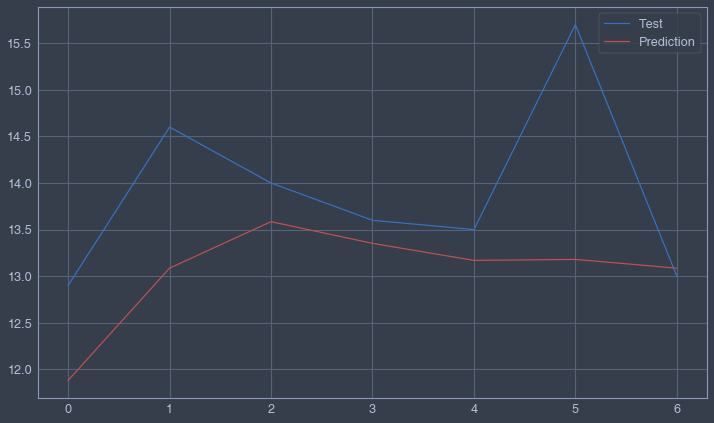

In [56]:
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]

model = AutoReg(train, lags=25, old_names=False)
model_fit = model.fit()

print(f'Coefficients: {model_fit.params}')

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print(f'predicted={predictions[i]}, expected={test[i]}')

rmse = np.sqrt(mean_squared_error(test, predictions))

print(f'Test RMSE: {rmse:.3f}')

visualize(test, predictions)

### Updated Autoregression Model

predicted=[11.88124697], expected=[12.9]
predicted=[13.68752343], expected=[14.6]
predicted=[14.38557248], expected=[14.]
predicted=[13.50815644], expected=[13.6]
predicted=[13.3911263], expected=[13.5]
predicted=[13.47346045], expected=[15.7]
predicted=[14.65904577], expected=[13.]
Test RMSE: 1.180


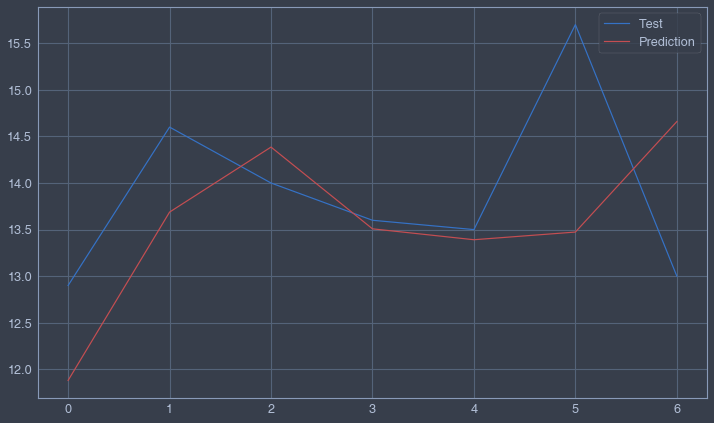

In [61]:
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]

window = 25
model = AutoReg(train, lags=25, old_names=False)
model_fit = model.fit()
coef = model_fit.params

history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]

predictions = []
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        
    predictions.append(yhat)
    history.append(obs)
        
    print(f'predicted={yhat}, expected={obs}')
    
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

visualize(test, predictions)

## Simulate AR(1) Time Series and Compare the ACF for Several AR Time Series

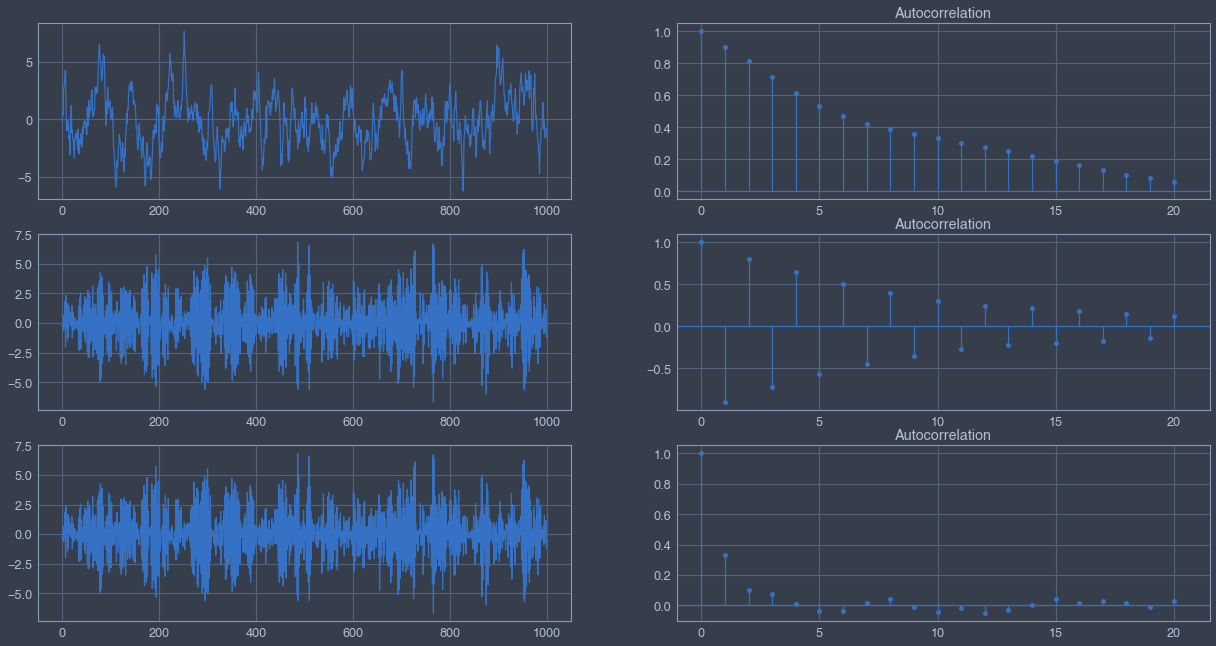

In [3]:
fig, ax = plt.subplots(3, 2, figsize=(21, 11))

# Plot 1.1: AR parameter = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
ax[0, 0].plot(simulated_data_1);

# Plot 1.2: AR parameter = +0.9
# Compare the ACF for Several AR Time Series
plot_acf(simulated_data_1, alpha=1, lags=20, ax=ax[0, 1]); 

# Plot 2.1: AR parameter = -0.9
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
ax[1, 0].plot(simulated_data_2);

# Plot 2.2: AR parameter = -0.9
# Compare the ACF for Several AR Time Series
plot_acf(simulated_data_2, alpha=1, lags=20, ax=ax[1, 1]);

# Plot 3.1: AR parameter = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
ax[2, 0].plot(simulated_data_2);

# Plot 3.2: AR parameter = +0.3
# Compare the ACF for Several AR Time Series
plot_acf(simulated_data_3, alpha=1, lags=20, ax=ax[2, 1]);

## Estimating and Forecasting AR Model

### Estimating an AR Model

In [20]:
mod = ARIMA(simulated_data_1, order=(1, 0, 0))
res = mod.fit()

print(res.summary())

print('When the true phi=0.9, the estimate of phi (and the constant) are:')
print(res.params)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1395.067
Date:                Wed, 07 Aug 2024   AIC                           2796.134
Time:                        19:51:04   BIC                           2810.857
Sample:                             0   HQIC                          2801.729
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1122      0.305     -0.368      0.713      -0.709       0.485
ar.L1          0.8987      0.013     68.761      0.000       0.873       0.924
sigma2         0.9518      0.044     21.758      0.0

### Forecasting with an AR Model

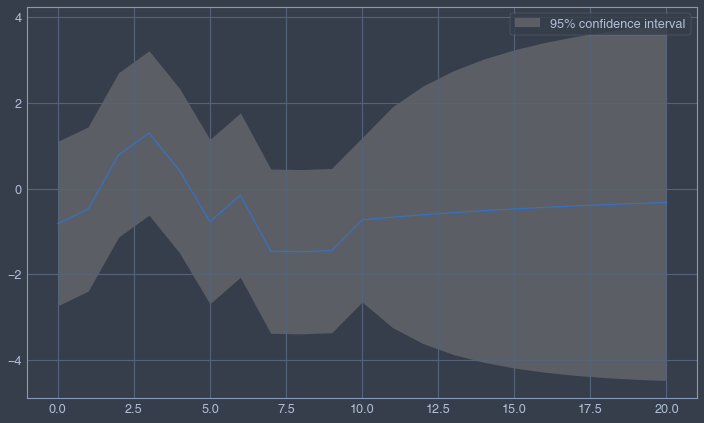

In [32]:
mod = ARIMA(simulated_data_1, order=(1, 0, 0))
res = mod.fit()
plot_predict(res, start=990, end=1010);

### Forecast Interest Rates

In [4]:
bonds = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/daily_rates.csv',
                    index_col=0)
bonds.index = pd.to_datetime(bonds.index, format="%Y-%m-%d")
bonds.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [5]:
interest_rate_data = bonds.resample(rule='A').last()
interest_rate_data.head()

,US10Y
DATE,
1962-12-31,3.85
1963-12-31,4.14
1964-12-31,4.21
1965-12-31,4.65
1966-12-31,4.64


f:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


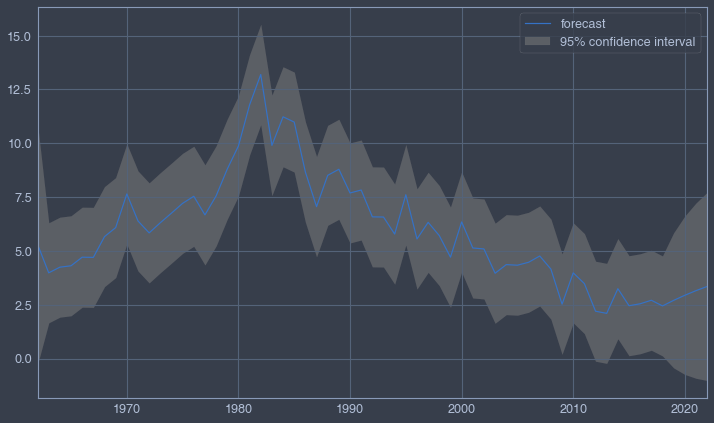

In [36]:
mod = ARIMA(interest_rate_data, order=(1, 0, 0))
res = mod.fit()

plot_predict(res, start=0, end='2022');

f:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='DATE'>

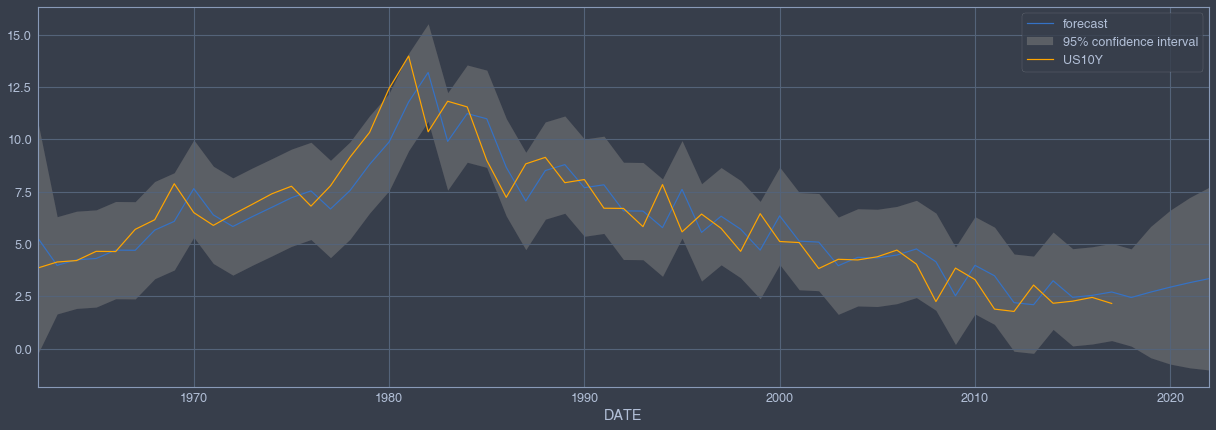

In [48]:
fig, ax = plt.subplots(1, figsize=(21, 7))

plot_predict(res, start=0, end='2022', ax=ax);
interest_rate_data.plot(ax=ax, c='orange')

### Compare AR Model with Random Walk

In [2]:
simulated_data = np.array([5.        , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482])

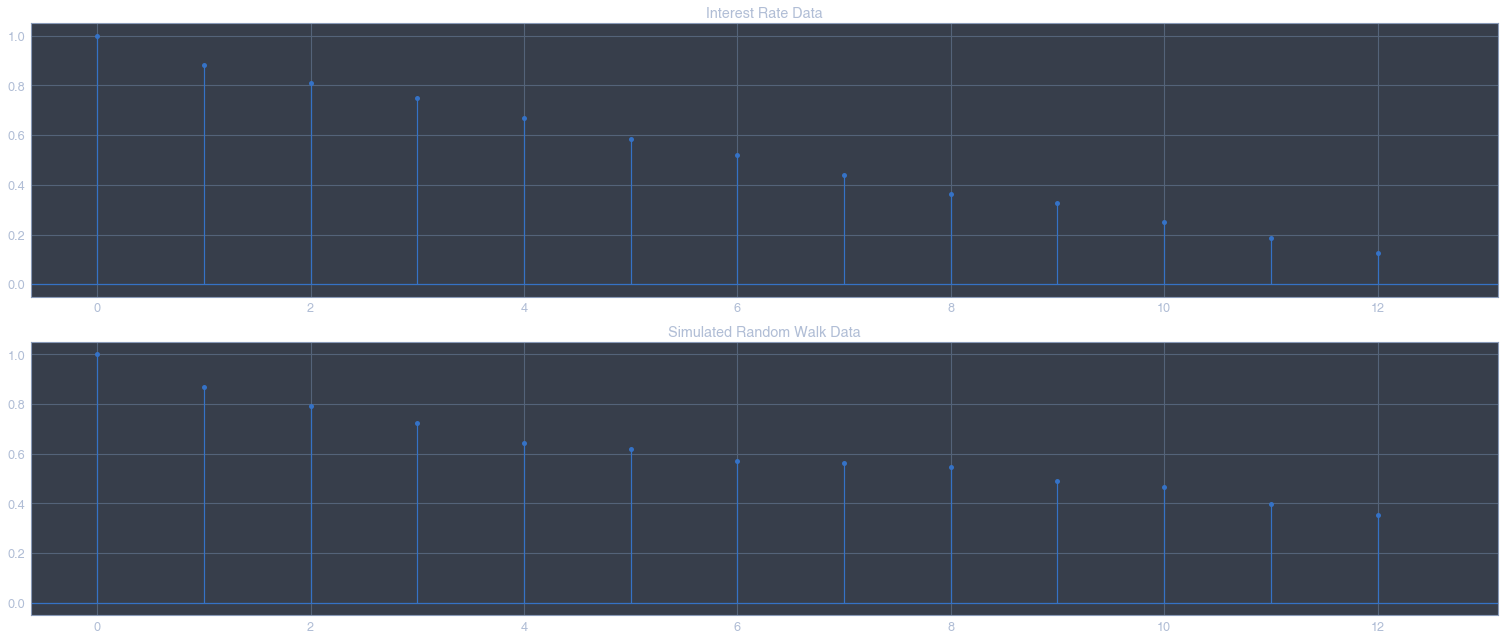

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(21, 9))

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0]);

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1]);

# Label axes
axes[0].set_title("Interest Rate Data");
axes[1].set_title("Simulated Random Walk Data");

plt.tight_layout()


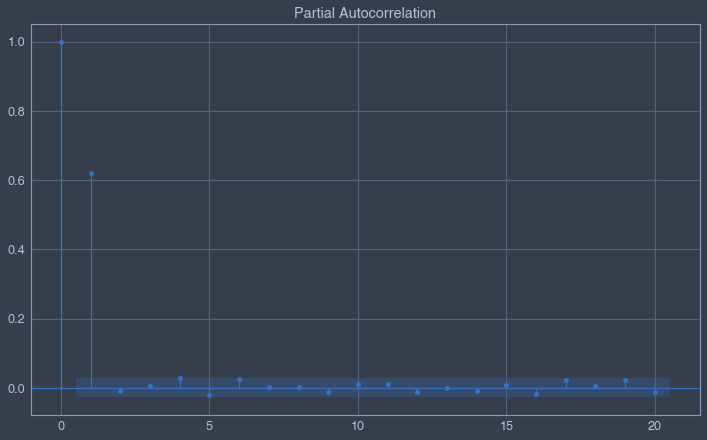

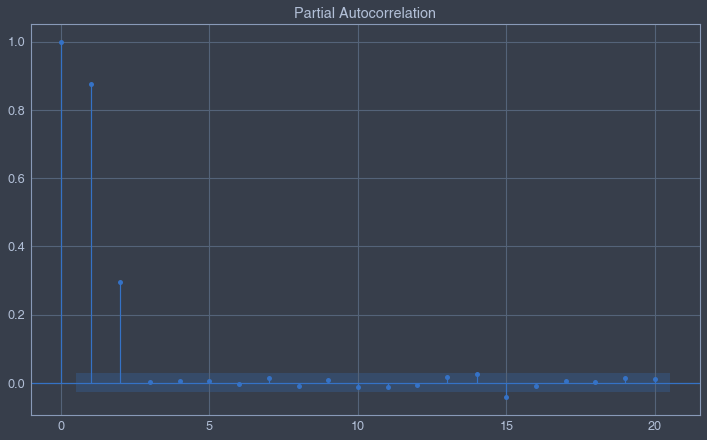

In [13]:
# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20);

# simulated AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20);

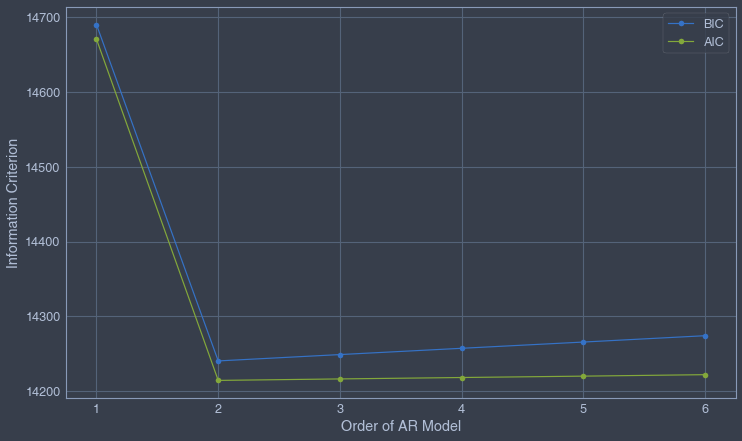

In [18]:
BIC = np.zeros(7)
AIC = np.zeros(7)

for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p, 0, 0))
    res = mod.fit()
    BIC[p] = res.bic
    AIC[p] = res.aic

plt.plot(range(1, 7), BIC[1:7], marker='o', label='BIC', c='b');
plt.plot(range(1, 7), AIC[1:7], marker='o', label='AIC', c='g');
plt.xlabel('Order of AR Model');
plt.ylabel('Information Criterion');
plt.legend()